In [21]:
import csv

def load_dataset(file_path, has_header=True):
    data = []
    with open(file_path, "r") as f:
        reader = csv.reader(f)
        #if has_header:
        #   next(reader)  # skip header row if there's any header
        for row in reader:
            vector = [float(val) for val in row]  # convert all values to float
            data.append(vector)
    return data

# My dataset path in Colab Notebook
file_path = "dataset1.csv"

points = load_dataset(file_path, has_header=True)

print("First 5 points:", points[:5])


First 5 points: [[2.060318735, 2.316620425], [3.426070632, 2.282277182], [3.464441523, 0.7163178618], [2.982301009, 3.256475749], [0.9864879309, 0.7584112849]]


In [22]:
num_rows = len(points)          # number of data points
num_cols = len(points[0])       # number of dimensions per point

print("Shape:", (num_rows, num_cols))


Shape: (1000, 2)


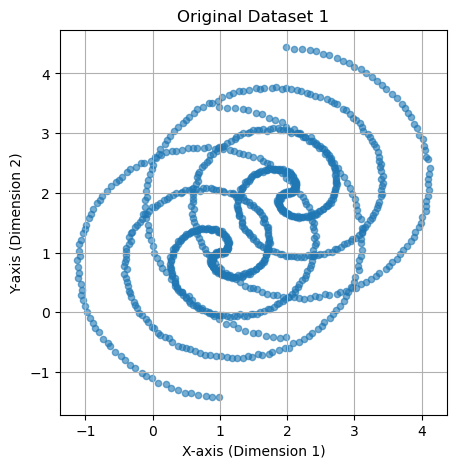

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy array
X = np.array(points)   # shape (1000, 2)

# Plot original dataset
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], alpha=0.6, s=20)
plt.xlabel("X-axis (Dimension 1)")
plt.ylabel("Y-axis (Dimension 2)")
plt.title("Original Dataset 1")
plt.grid(True)
plt.show()


### Step 1: Data Centering

Before calculating the covariance matrix for PCA, we need to **center the data**.  
This means subtracting the mean of each dimension (feature) from the corresponding coordinate of every data point.

Mathematically, for data matrix $X \in \mathbb{R}^{n \times d}$:

$$
X_{centered} = X - \mu
$$

where  
- $n$ = number of data points  
- $d$ = number of dimensions  
- $\mu = \frac{1}{n} \sum_{i=1}^n x_i$ is the mean vector of shape $1 \times d$.  

This ensures that each feature has **zero mean**, which is required for correct PCA computation.


In [4]:
X = np.array(points)  # shape (n, d) = (1000, 2)

# Step 1: compute mean of each dimension
mean_vector = np.mean(X, axis=0)   # shape (2,)

# Step 2: subtract mean from data
X_centered = X - mean_vector

print("Mean vector:", mean_vector)
print("First 5 centered points:\n", X_centered[:5])


num_rows = len(X_centered)          # number of data points
num_cols = len(X_centered[0])       # number of dimensions per point

print("Shape:", (num_rows, num_cols))


Mean vector: [1.500568   1.49939359]
First 5 centered points:
 [[ 0.55975073  0.81722683]
 [ 1.92550263  0.78288359]
 [ 1.96387352 -0.78307573]
 [ 1.48173301  1.75708216]
 [-0.51408007 -0.74098231]]
Shape: (1000, 2)


### Step 2: Covariance Matrix

The covariance matrix captures how the dimensions (features) of the dataset vary with respect to each other.

For a dataset $X_{centered} \in \mathbb{R}^{n \times d}$ (where $n$ = number of data points and $d$ = number of dimensions):

$$
C = \frac{1}{n} X_{centered}^T X_{centered}
$$

- $C$ is a $d \times d$ matrix.
- Each entry $C_{ij}$ represents the covariance between feature $i$ and feature $j$.
- Diagonal entries $C_{ii}$ are the variances of each feature.
- Off-diagonal entries $C_{ij}, i \neq j$ show how much two features vary together.

Since your dataset is 2D, the covariance matrix will be $2 \times 2$.


In [5]:
# X_centered is (n x d), here (1000 x 2)
n = X_centered.shape[0]

# Covariance matrix formula: (1/n) * X_centered^T @ X_centered
cov_matrix = (X_centered.T @ X_centered) / n

print("Covariance matrix:\n", cov_matrix)


Covariance matrix:
 [[1.23082127 0.38386275]
 [0.38386275 1.26532787]]


### Step 3: Eigen Decomposition

To perform PCA, we need to find the **eigenvalues** and **eigenvectors** of the covariance matrix.

- The **eigenvalues** represent the amount of variance captured by each principal component.
- The **eigenvectors** represent the directions of these principal components in the original feature space.

For covariance matrix $C$:

$$
C v_i = \lambda_i v_i
$$

where  
- $\lambda_i$ is the eigenvalue (variance explained by the component),  
- $v_i$ is the corresponding eigenvector (direction of the component).  

We sort eigenvalues in descending order so that the first principal component corresponds to the direction of maximum variance.


In [6]:
# Eigen decomposition of covariance matrix
eigvals, eigvecs = np.linalg.eigh(cov_matrix)  # eigh since C is symmetric

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)


Eigenvalues: [1.63232486 0.86382428]
Eigenvectors:
 [[ 0.69104949 -0.72280745]
 [ 0.72280745  0.69104949]]


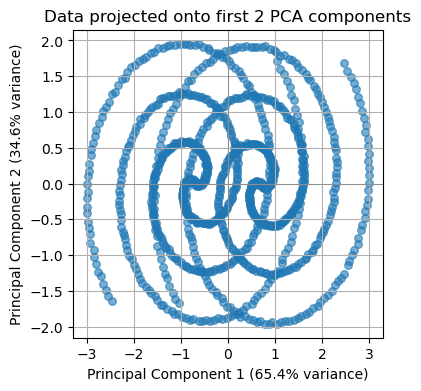

In [7]:
# Compute variance explained
total_variance = np.sum(eigvals)
var_exp_pc1 = eigvals[0] / total_variance * 100
var_exp_pc2 = eigvals[1] / total_variance * 100

# Project data onto the 2 principal components
Z = X_centered @ eigvecs   # shape (n, 2)

# Plot
plt.figure(figsize=(4,4))
plt.scatter(Z[:,0], Z[:,1], alpha=0.6, s=30)
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.xlabel(f"Principal Component 1 ({var_exp_pc1:.1f}% variance)")
plt.ylabel(f"Principal Component 2 ({var_exp_pc2:.1f}% variance)")
plt.title("Data projected onto first 2 PCA components")
plt.grid(True)
plt.show()


### 1 a)

V^T V =
 [[ 1. -0.]
 [-0.  1.]]
PC1 explains 65.39% of variance
PC2 explains 34.61% of variance


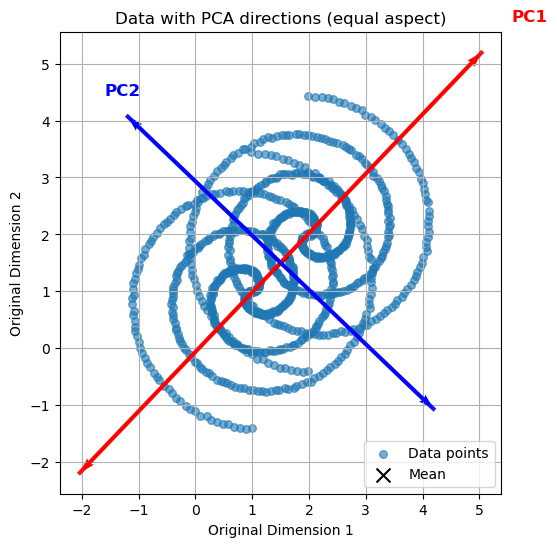

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# --- compute eigenpairs robustly from covariance ---
cov = np.cov(X, rowvar=False)             # 2x2 covariance
eigvals, eigvecs = np.linalg.eigh(cov)   # eigh is preferable for symmetric matrices

# sort descending (PC1 first)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# normalize columns to unit length (should already be orthonormal but do this to be safe)
eigvecs = eigvecs / np.linalg.norm(eigvecs, axis=0)

# quick orthogonality check (should be identity)
print("V^T V =\n", np.round(eigvecs.T @ eigvecs, 6))

# --- variance explained ---
total_var = np.sum(eigvals)
var_explained = eigvals / total_var * 100
for i, v in enumerate(var_explained):
    print(f"PC{i+1} explains {v:.2f}% of variance")

# --- plotting ---
mean_vector = np.mean(X, axis=0)
colors = ['red', 'blue']
scale_factor = 4.0
scales = scale_factor * np.sqrt(eigvals)   # scale arrows by sqrt(eigval) for visibility

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], alpha=0.6, s=30, label='Data points')

for i in range(2):
    v = eigvecs[:, i] * scales[i]
    # draw full line through the mean (both directions)
    ax.plot([mean_vector[0] - v[0], mean_vector[0] + v[0]],
            [mean_vector[1] - v[1], mean_vector[1] + v[1]],
            color=colors[i], linewidth=3, alpha=0.9)
    # add arrowheads using quiver (positive and negative directions)
    ax.quiver(mean_vector[0], mean_vector[1],  v[0],  v[1],
              angles='xy', scale_units='xy', scale=1, width=0.007, color=colors[i])
    ax.quiver(mean_vector[0], mean_vector[1], -v[0], -v[1],
              angles='xy', scale_units='xy', scale=1, width=0.007, color=colors[i])
    ax.text(mean_vector[0] + v[0]*1.15, mean_vector[1] + v[1]*1.15,
            f'PC{i+1}', color=colors[i], fontsize=12, weight='bold')

ax.scatter(mean_vector[0], mean_vector[1], color='black', marker='x', s=100, label='Mean')
ax.set_xlabel('Original Dimension 1')
ax.set_ylabel('Original Dimension 2')
ax.set_title('Data with PCA directions (equal aspect)')
ax.set_aspect('equal', adjustable='box')   # makes x,y scales equal
ax.grid(True)
ax.legend()
plt.savefig("pca_directions.png", dpi=300, bbox_inches='tight')
plt.show()


### Kernel PCA Projection

In Kernel PCA, after constructing and centering the kernel matrix \(K_c \in \mathbb{R}^{n \times n}\), 
the data is mapped into a lower-dimensional feature space using the leading eigenvectors of \(K_c\).

If we select the top \(k\) eigenvectors (arranged as columns in the matrix \(V_k \in \mathbb{R}^{n \times k}\)), 
the new representation of the data is obtained as:

\[
Z = K_c \, V_k
\]

where:

- \(K_c\): the centered kernel matrix of size \(n \times n\)  
- \(V_k\): the matrix containing the top \(k\) eigenvectors  
- \(Z\): the projection of the original data into a \(k\)-dimensional feature space  

In words, each sample is expressed in terms of the most significant kernel principal components 
by multiplying the centered kernel matrix with the corresponding eigenvectors.


In [15]:
# --- Convert your data (list of lists) into NumPy array ---
X = np.array(points)   # shape (n, d) e.g. (1000, 2)
n, d = X.shape

# --- 1) Build linear kernel (Gram) matrix K = X X^T ---
K = X @ X.T    # shape (n, n)

# --- 2) Center the kernel matrix ---
one_n = np.ones((n, n)) / n
Kc = K - one_n @ K - K @ one_n + one_n @ K @ one_n

# --- 3) Eigen decomposition (symmetric) ---
eigvals, eigvecs = np.linalg.eigh(Kc)   # eigh returns ascending eigenvalues
# sort descending
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Clip small negative eigenvalues (numerical noise)
eigvals_clipped = np.clip(eigvals, a_min=0, a_max=None)

# --- 4) Compute projections onto top-2 kernel principal components ---
k = 2
# Raw projections
scores = Kc @ eigvecs[:, :k]   # shape (n, k)
# Normalize each column by sqrt(eigenvalue) to get proper KPCA coordinates
# avoid division by zero for tiny eigenvalues
eps = 1e-12
norm_factors = np.sqrt(eigvals_clipped[:k] + eps)   # shape (k,)
Z = scores / norm_factors[np.newaxis, :]            # shape (n, k)


Top eigenvalues: [1.63232486e+03 8.63824279e+02 9.98472355e-13 4.18816684e-13]
PVE PC1 = 65.39%, PC2 = 34.61%, Top2 combined = 100.00%


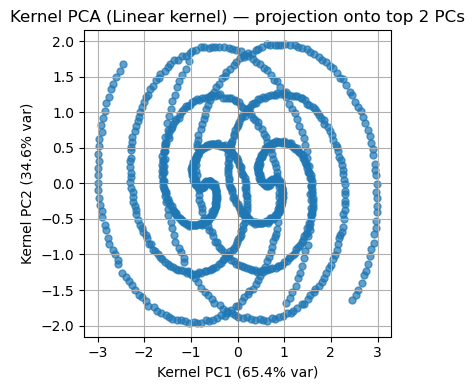

In [16]:

# ---  Variance explained (proportion) in kernel space ---
total_var = eigvals_clipped.sum()
pve = eigvals_clipped / total_var if total_var > 0 else np.zeros_like(eigvals_clipped)
pve_pc1 = 100 * pve[0]
pve_pc2 = 100 * (pve[1] if pve.size > 1 else 0.0)

print(f"Top eigenvalues: {eigvals_clipped[:4]}")
print(f"PVE PC1 = {pve_pc1:.2f}%, PC2 = {pve_pc2:.2f}%, Top2 combined = {(pve_pc1 + pve_pc2):.2f}%")

# ---  Plot projection (n x 2) ---
plt.figure(figsize=(4,4))
plt.scatter(Z[:,0], Z[:,1], alpha=0.7, s=25)
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.xlabel(f"Kernel PC1 ({pve_pc1:.1f}% var)")
plt.ylabel(f"Kernel PC2 ({pve_pc2:.1f}% var)")
plt.title("Kernel PCA (Linear kernel) — projection onto top 2 PCs")
plt.grid(True)
plt.tight_layout()
plt.show()


### 1 b)Kernel PCA Projection

In Kernel PCA, we first build the kernel matrix and center it, denoted by \(K_c \in \mathbb{R}^{n \times n}\).  
To reduce the dimensionality, we take the eigenvectors of \(K_c\) that correspond to the largest eigenvalues.

If the top \(k\) eigenvectors are arranged as columns in \(V_k \in \mathbb{R}^{n \times k}\), 
then the projected data is:

\[
Z = K_c \, V_k
\]

Here:

- \(K_c\): centered kernel matrix  
- \(V_k\): eigenvectors for the top \(k\) eigenvalues  
- \(Z\): the new representation of the \(n\) data points in \(k\)-dimensional space  

Put simply, Kernel PCA represents each sample in terms of the main directions of variation 
in the kernel-induced feature space by multiplying \(K_c\) with the selected eigenvectors.


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def kernel_pca_polynomial(X, degree, k=2):
    n = X.shape[0]
    # --- Polynomial kernel ---
    K = (X @ X.T + 1) ** degree

    # --- Center kernel ---
    one_n = np.ones((n, n)) / n
    Kc = K - one_n @ K - K @ one_n + one_n @ K @ one_n

    # --- Eigen decomposition ---
    eigvals, eigvecs = np.linalg.eigh(Kc)
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    eigvals_clipped = np.clip(eigvals, a_min=0, a_max=None)
    scores = Kc @ eigvecs[:, :k]
    eps = 1e-12
    Z = scores / np.sqrt(eigvals_clipped[:k] + eps)

    total_var = eigvals_clipped.sum()
    pve = eigvals_clipped / total_var if total_var > 0 else np.zeros_like(eigvals_clipped)

    return Z, pve



### Testing the Polynomial Kernel on Degrees 2, 3, 4, and 5

The polynomial kernel is defined as:

\[
K(x, y) = (x^\top y + c)^d
\]

where  
- \(d\) is the degree of the polynomial,  
- \(c \geq 0\) is a constant (often set to 1).  

To study its effect, we can experiment with different degrees:

- **Degree 2**: captures quadratic interactions between features.  
- **Degree 3**: includes cubic terms, allowing more complex decision boundaries.  
- **Degree 4 & 5**: generate even higher-order feature interactions, which can model very flexible patterns but may also lead to overfitting.  

By applying Kernel PCA with \(d = 2, 3, 4, 5\), we can compare how the data is represented in the transformed feature space and observe the trade-off between model flexibility and generalization.


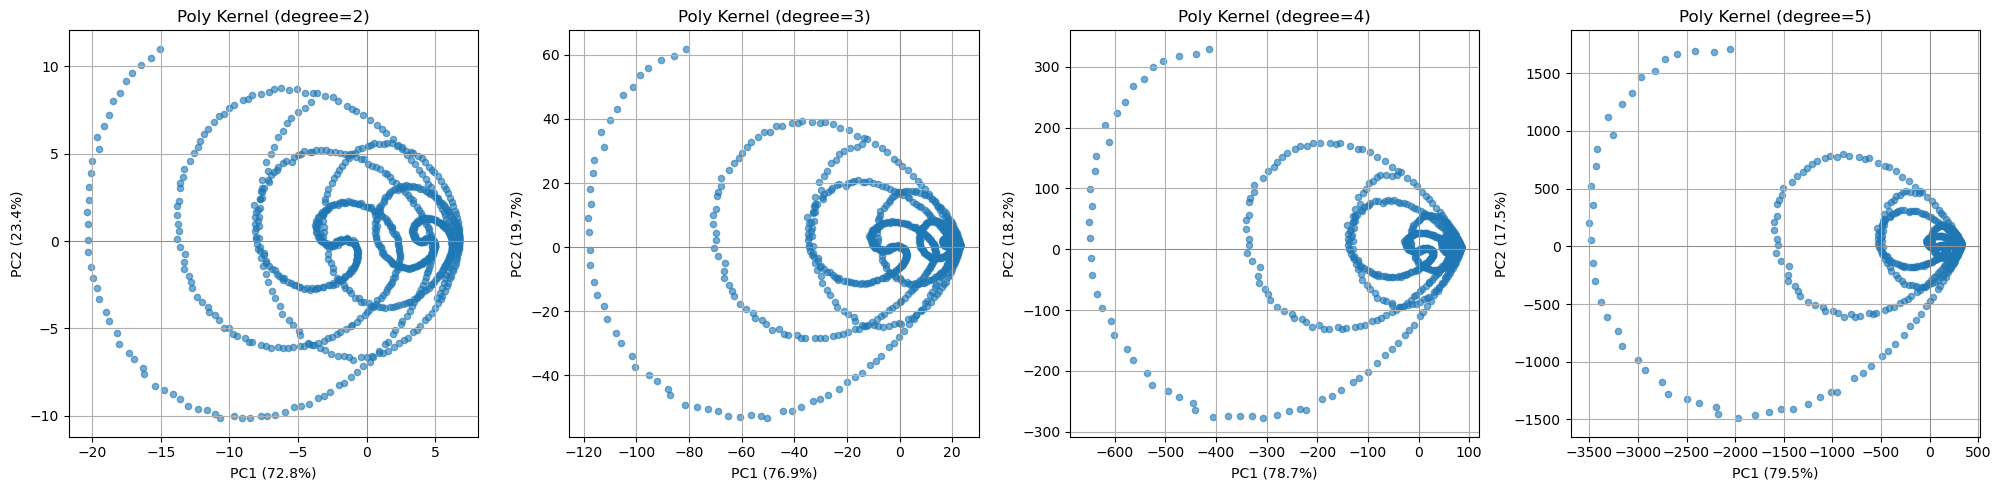

In [31]:
# --- Run for degrees 2,3,4,5 ---
degrees = [2,3,4,5]
fig, axes = plt.subplots(1, len(degrees), figsize=(20,5))  # 1 row, 4 columns

for i, deg in enumerate(degrees):
    Z, pve = kernel_pca_polynomial(np.array(points), degree=deg, k=2)
    pve_pc1, pve_pc2 = 100*pve[0], 100*pve[1]

    ax = axes[i]
    ax.scatter(Z[:,0], Z[:,1], alpha=0.6, s=20)
    ax.axhline(0, color="gray", linewidth=0.5)
    ax.axvline(0, color="gray", linewidth=0.5)
    ax.set_xlabel(f"PC1 ({pve_pc1:.1f}%)")
    ax.set_ylabel(f"PC2 ({pve_pc2:.1f}%)")
    ax.set_title(f"Poly Kernel (degree={deg})")
    ax.grid(True)

plt.tight_layout()
plt.savefig("kernel_pca_polynomial.png", dpi=300, bbox_inches='tight')  # save as high-res PNG
plt.show()


### Testing the Polynomial Kernel on Degrees 2, 3, 4, and 5

A polynomial kernel maps input data into a higher-dimensional space using:

\[
K(x, y) = (x^\top y + c)^d
\]

- \(d\): the degree of the polynomial  
- \(c \geq 0\): a constant (commonly set to 1)  

To see its effect, we can try different degrees:

- **Degree 2** → introduces quadratic feature combinations.  
- **Degree 3** → adds cubic interactions, giving more complex separation.  
- **Degree 4 & 5** → bring in even higher-order terms, allowing very flexible decision boundaries but with greater risk of overfitting.  

Running Kernel PCA with \(d = 2, 3, 4, 5\) gives us a way to visualize how increasing the polynomial degree changes the representation of the data in the new feature space.


In [19]:
X = np.array(points)   # (n, d)

def center_kernel(K):
    n = K.shape[0]
    one_n = np.ones((n, n)) / n
    return K - one_n @ K - K @ one_n + one_n @ K @ one_n

def rbf_kernel(X, sigma):
    n = X.shape[0]
    sq_dists = np.sum(X**2, axis=1).reshape(-1,1) + np.sum(X**2, axis=1) - 2 * (X @ X.T)
    K = np.exp(-sq_dists / (2 * sigma**2))
    return K

def kpca_rbf_and_project(X, sigma, top_k=2):
    K = rbf_kernel(X, sigma)
    Kc = center_kernel(K)

    eigvals, eigvecs = np.linalg.eigh(Kc)
    idx = np.argsort(eigvals)[::-1]
    eigvals, eigvecs = eigvals[idx], eigvecs[:, idx]

    Z = Kc @ eigvecs[:, :top_k]

    eigvals_clipped = np.clip(eigvals, a_min=0, a_max=None)
    pve = eigvals_clipped / np.sum(eigvals_clipped) if eigvals_clipped.sum() > 0 else np.zeros_like(eigvals_clipped)

    return Z, pve, eigvals

# Different sigma values to try
sigmas = [0.1, 0.5, 1, 2, 5, 10]



### Plotting the graph of rbf kernel having different sigmas on the dataset

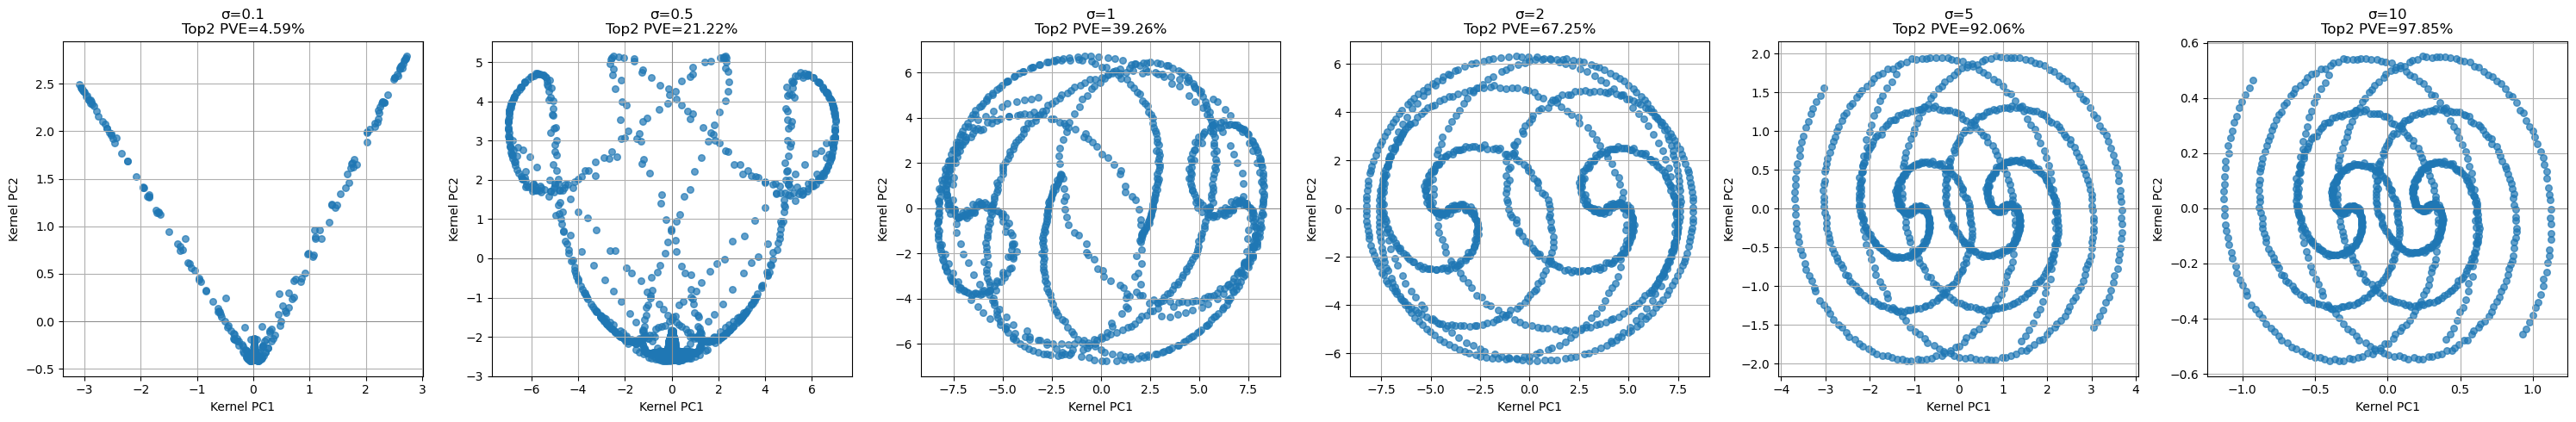

In [32]:
cols = 6
rows = int(np.ceil(len(sigmas)/cols))

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()

for i, sigma in enumerate(sigmas):
    Z, pve, eigvals = kpca_rbf_and_project(X, sigma=sigma, top_k=2)
    pve_top2 = 100 * (pve[0] + (pve[1] if pve.size > 1 else 0))

    ax = axes[i]
    ax.scatter(Z[:,0], Z[:,1], s=30, alpha=0.7)
    ax.axhline(0, linewidth=0.5, color="gray")
    ax.axvline(0, linewidth=0.5, color="gray")
    ax.set_title(f"σ={sigma}\nTop2 PVE={pve_top2:.2f}%")
    ax.set_xlabel("Kernel PC1")
    ax.set_ylabel("Kernel PC2")
    ax.grid(True)

plt.tight_layout()

# --- Save figure ---
plt.savefig("kernel_pca_rbf_sigma.png", dpi=300, bbox_inches='tight')

plt.show()


## 1 c)

The dataset under study has a clear **nonlinear spiral pattern**, which makes the choice of kernel in Kernel PCA especially important.

- **Linear Kernel**: Not effective here, since it cannot separate nonlinear structures. The spiral arms remain overlapped.  
- **Polynomial Kernel**: Adds higher-order terms but mainly stretches and distorts the data, making the spiral harder to interpret.  
- **RBF Kernel**: Works best, as it maps the spiral into a higher-dimensional feature space where the arms can be separated more clearly.  

Within the RBF family, setting **σ = 2** produces the most meaningful embedding:  
- The spiral arms are untangled and well-separated,  
- The geometry of the spiral is preserved without flattening,  
- The variance explained (~67%) is sufficient to capture the key structure without losing detail.  

**Final takeaway:** For this dataset, the RBF kernel with σ = 2 provides the most effective Kernel PCA projection.
